<a href="https://colab.research.google.com/github/KauaHenSilva/python_facial_detection/blob/main/face_point_detection_using_dlib/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import dlib
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image

## Setup

In [63]:
import requests
import os
import zipfile
import shutil

url1 = "https://raw.githubusercontent.com/GuoQuanhao/68_points/master/shape_predictor_68_face_landmarks.dat"
url2 = "https://raw.githubusercontent.com/ageitgey/face_recognition_models/master/face_recognition_models/models/dlib_face_recognition_resnet_model_v1.dat"

request1 = requests.get(url1)
request2 = requests.get(url2)

with open('shape_predictor_68_face_landmarks.dat', 'wb') as f:
    f.write(request1.content)

with open('dlib_face_recognition_resnet_model_v1.dat', 'wb') as f:
    f.write(request2.content)


def download_large_file_from_google_drive(file_id, destination):
    base_url = "https://drive.google.com/uc?export=download"

    with requests.Session() as session:
        response = session.get(base_url, params={'id': file_id}, stream=True)
        for key, value in response.cookies.items():
            if key.startswith('download_warning'):
                confirm_token = value
                break
        else:
            confirm_token = None

        if confirm_token:
            params = {'id': file_id, 'confirm': confirm_token}
            response = session.get(base_url, params=params, stream=True)

        # Escrever o conteúdo do arquivo no destino
        with open(destination, 'wb') as f:
            for chunk in response.iter_content(32768):
                f.write(chunk)

download_large_file_from_google_drive('1DjGeC4tbRc3IBb8j2jJPGznBPUUSFVAz', 'people2.jpg')
download_large_file_from_google_drive('1l2wyk0--oFj_agtV2MuTPkkvfGZatTnN', 'yalefaces.rar')

with zipfile.ZipFile('yalefaces.rar', 'r') as zip_ref:
    zip_ref.extractall('yalefaces_temp')

if not os.path.exists('yalefaces'):
    shutil.move('yalefaces_temp/yalefaces', 'yalefaces')

shutil.rmtree('yalefaces_temp')
os.remove('yalefaces.rar')

In [64]:
detector = dlib.get_frontal_face_detector()
detecter_points = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
descritor_facial_extrator = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')

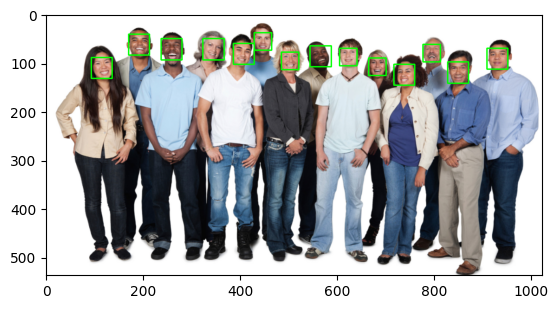

In [65]:
img = cv2.imread('people2.jpg')

imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = detector(imgRGB, 1)

for face in faces:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(imgRGB, (l, t), (r, b), (0, 255, 0), 2)

plt.imshow(imgRGB)

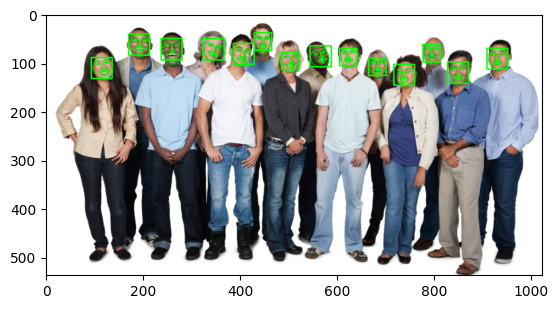

In [66]:

for face in faces:
    shape = detecter_points(imgGray, face)
    for ponto in shape.parts():
        cv2.circle(imgRGB, (ponto.x, ponto.y), 2, (0, 255, 0), 1)

plt.imshow(imgRGB)

In [67]:
index = {}
idx = 0
descritores_faciais= None

paths = [os.path.join('./yalefaces/train', i) for i in os.listdir('yalefaces/train')]

for path in paths:
    img = Image.open(path).convert('RGB')
    img_np = np.array(img)

    detections = detector(img_np, 1)
    for face in detections:
        l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
        cv2.rectangle(img_np, (l, t), (r, b), (0, 255, 0), 2)

        pontos = detecter_points(img_np, face)
        for ponto in pontos.parts():
            cv2.circle(img_np, (ponto.x, ponto.y), 2, (0, 255, 0), 1)

        descritor_facial = descritor_facial_extrator.compute_face_descriptor(img_np, pontos)
        descritor_facial = [f for f in descritor_facial]
        descritor_facial = np.asarray(descritor_facial, dtype=np.float64)
        descritor_facial = descritor_facial[np.newaxis, :]

        if descritores_faciais is None:
            descritores_faciais = descritor_facial
        else:
            descritores_faciais = np.concatenate((descritores_faciais, descritor_facial), axis=0)

        index[idx] = path
        idx += 1


In [68]:
descritores_faciais.shape

(132, 128)

In [69]:
index

{0: './yalefaces/train/subject05.leftlight.gif',
 1: './yalefaces/train/subject09.sleepy.gif',
 2: './yalefaces/train/subject07.glasses.gif',
 3: './yalefaces/train/subject10.noglasses.gif',
 4: './yalefaces/train/subject11.sleepy.gif',
 5: './yalefaces/train/subject13.happy.gif',
 6: './yalefaces/train/subject09.centerlight.gif',
 7: './yalefaces/train/subject08.noglasses.gif',
 8: './yalefaces/train/subject08.glasses.gif',
 9: './yalefaces/train/subject10.glasses.gif',
 10: './yalefaces/train/subject09.glasses.gif',
 11: './yalefaces/train/subject10.rightlight.gif',
 12: './yalefaces/train/subject12.noglasses.gif',
 13: './yalefaces/train/subject02.sad.gif',
 14: './yalefaces/train/subject12.sleepy.gif',
 15: './yalefaces/train/subject15.wink.gif',
 16: './yalefaces/train/subject11.wink.gif',
 17: './yalefaces/train/subject03.wink.gif',
 18: './yalefaces/train/subject15.surprised.gif',
 19: './yalefaces/train/subject03.centerlight.gif',
 20: './yalefaces/train/subject13.wink.gif',
 2

In [70]:
descritores_faciais[131]

array([-6.75326735e-02,  4.48671430e-02,  1.82294101e-02, -1.68961193e-02,
       -6.70645535e-02, -6.09297901e-02, -4.75602150e-02, -8.78292769e-02,
        1.48784563e-01, -6.29269332e-02,  1.40698135e-01, -6.30189180e-02,
       -1.71824798e-01, -5.55208623e-02, -3.09087634e-02,  1.39472723e-01,
       -9.75561514e-02, -1.04379080e-01, -9.74183381e-02, -1.17599770e-01,
        3.20202708e-02,  2.15825811e-03,  5.00554144e-02,  7.23809004e-03,
       -1.54179782e-01, -3.31345141e-01, -1.46313652e-01, -9.87432376e-02,
        4.78827506e-02, -1.24149099e-01, -7.54233152e-02,  2.40571275e-02,
       -2.53822446e-01, -5.32846637e-02, -2.87179127e-02,  6.93782121e-02,
       -3.72761637e-02, -7.83750862e-02,  2.06176549e-01,  8.41985345e-02,
       -1.31075442e-01,  8.82120132e-02,  7.68823922e-02,  1.96192354e-01,
        1.85128376e-01,  3.95940170e-02,  2.26255879e-02, -1.56053603e-02,
       -1.45000368e-02, -1.66277379e-01,  1.12641975e-01,  1.25153527e-01,
        8.67512375e-02,  

In [71]:
np.linalg.norm(descritores_faciais[0] - descritores_faciais[131]) # Faces diferentes

0.7074439005680785

In [72]:
np.linalg.norm(descritores_faciais[0] - descritores_faciais[0]) # Faces Iguais

0.0

In [73]:
np.linalg.norm(descritores_faciais[0] - descritores_faciais, axis=1) # comparando com todos

array([0.        , 0.66417423, 0.85490103, 0.85063924, 0.71506895,
       0.65291887, 0.72519804, 0.86546649, 0.79537585, 0.85217851,
       0.68617484, 0.80503164, 0.68009573, 0.60752065, 0.57760962,
       0.56543348, 0.72473702, 0.70602764, 0.67928075, 0.75747415,
       0.71904287, 0.95016275, 0.63296733, 0.64587558, 0.83199215,
       0.75800225, 0.60186775, 0.71432074, 0.62730824, 0.72131249,
       0.86508098, 0.71324687, 0.82110637, 0.77887116, 0.58744776,
       0.60759956, 0.84121934, 0.84369248, 0.84844122, 0.43557566,
       0.70801099, 0.32557564, 0.76955094, 0.79178089, 0.72734679,
       0.75629352, 0.58281602, 0.4405033 , 0.73281155, 0.88612846,
       0.82001789, 0.56632935, 0.83269702, 0.71177523, 0.69583024,
       0.6350784 , 0.77283692, 0.56632935, 0.80627459, 0.86090048,
       0.76234774, 0.72447794, 0.6669062 , 0.87810203, 0.69583024,
       0.80431696, 0.63915518, 0.81871496, 0.83652637, 0.70021322,
       0.80892861, 0.6521496 , 0.7294491 , 0.83264959, 0.62152

In [74]:
np.argmin(np.linalg.norm(descritores_faciais[0] - descritores_faciais[1:], axis=1))

40

In [75]:
index[np.argmin(np.linalg.norm(descritores_faciais[0] - descritores_faciais[1:], axis=1)) + 1], index[0]


('./yalefaces/train/subject05.centerlight.gif',
 './yalefaces/train/subject05.leftlight.gif')

## Reconhecimento Facial

In [78]:
confianca = 0.5
paths = [os.path.join('./yalefaces/test', i) for i in os.listdir('./yalefaces/test')]

['./yalefaces/test/subject04.surprised.gif',
 './yalefaces/test/subject01.happy.gif',
 './yalefaces/test/subject02.centerlight.gif',
 './yalefaces/test/subject14.sad.gif',
 './yalefaces/test/subject13.sad.gif',
 './yalefaces/test/subject05.sleepy.gif',
 './yalefaces/test/subject10.sad.gif',
 './yalefaces/test/subject14.normal.gif',
 './yalefaces/test/subject06.leftlight.gif',
 './yalefaces/test/subject15.rightlight.gif',
 './yalefaces/test/subject11.glasses.gif',
 './yalefaces/test/subject06.happy.gif',
 './yalefaces/test/subject07.happy.gif',
 './yalefaces/test/subject12.rightlight.gif',
 './yalefaces/test/subject08.normal.gif',
 './yalefaces/test/subject05.surprised.gif',
 './yalefaces/test/subject09.rightlight.gif',
 './yalefaces/test/subject03.leftlight.gif',
 './yalefaces/test/subject04.leftlight.gif',
 './yalefaces/test/subject03.glasses.gif',
 './yalefaces/test/subject11.happy.gif',
 './yalefaces/test/subject01.gif',
 './yalefaces/test/subject13.sleepy.gif',
 './yalefaces/test/s

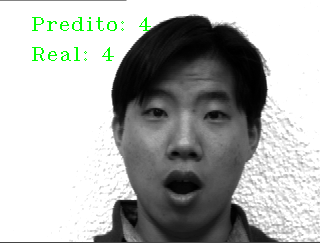

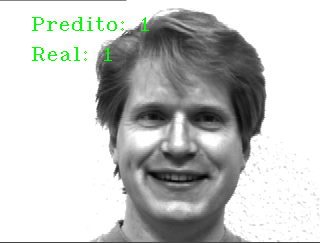

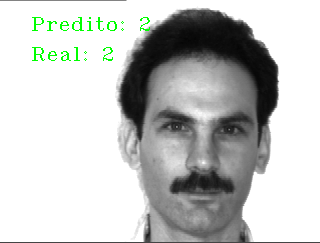

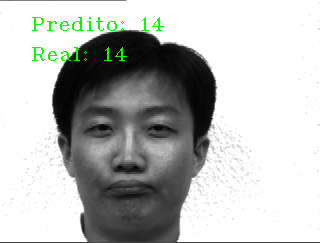

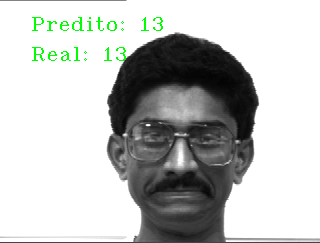

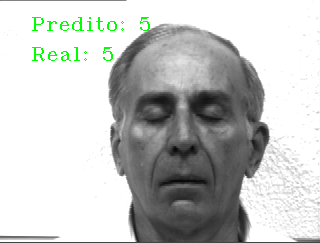

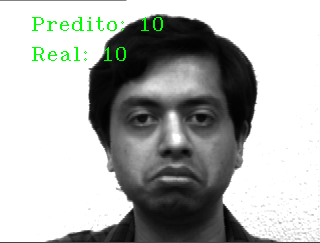

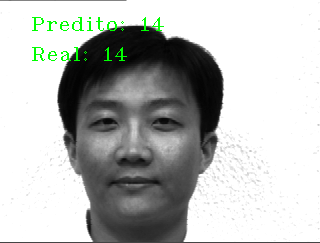

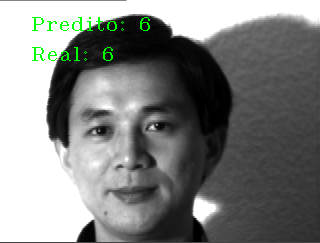

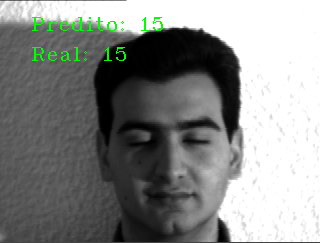

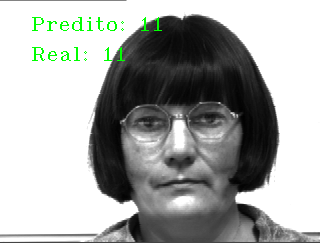

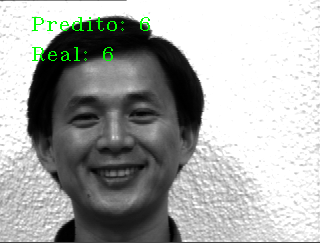

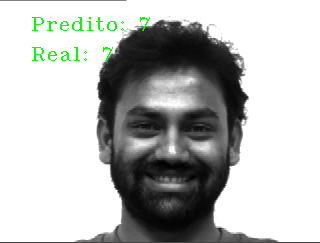

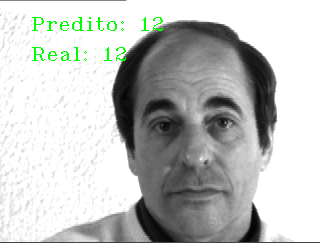

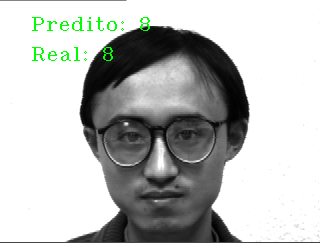

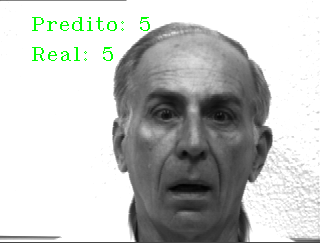

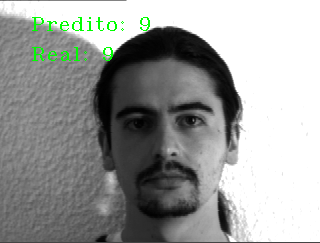

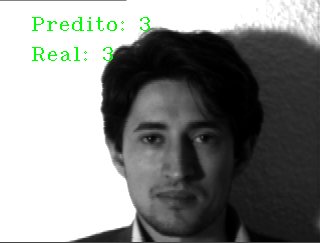

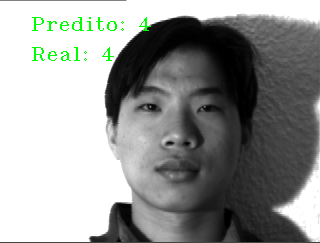

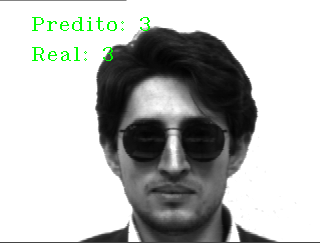

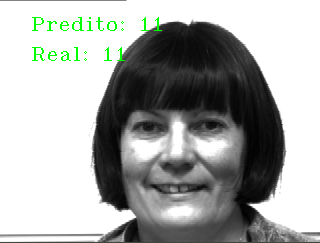

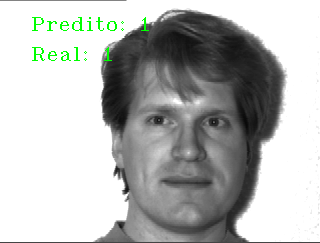

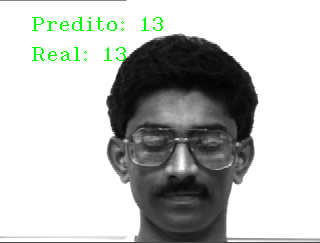

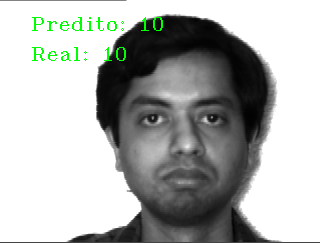

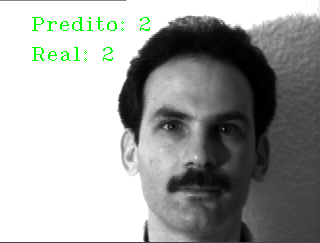

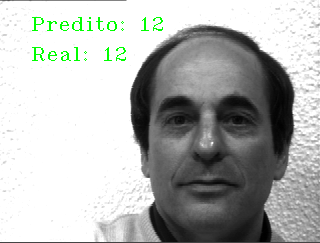

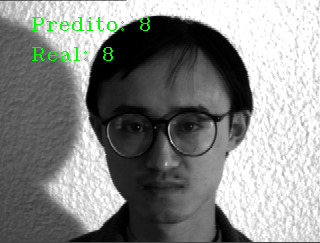

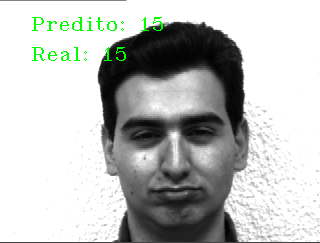

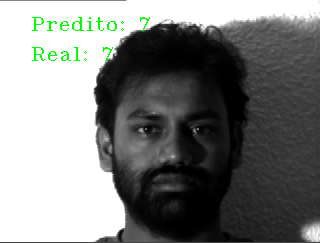

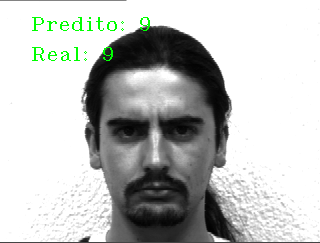

In [94]:
for path in paths:
    img = Image.open(path).convert('RGB')
    img_np = np.array(img, 'uint8')

    detections = detector(img_np, 1)
    for face in detections:
        pontos = detecter_points(img_np, face)

        descritor_facial = descritor_facial_extrator.compute_face_descriptor(img_np, pontos)
        descritor_facial = [f for f in descritor_facial]
        descritor_facial = np.asarray(descritor_facial, dtype=np.float64)
        descritor_facial = descritor_facial[np.newaxis, :]

        distancias = np.linalg.norm(descritor_facial - descritores_faciais, axis=1)
        indice_min = np.argmin(distancias)
        distancias_min = distancias[indice_min]


        if distancias_min <= confianca:
            nome_predito = int(os.path.split(index[indice_min])[1].split('.')[0].replace('subject', ''))
        else:
            nome_predito = 'Nao identificado'

        nome_real = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
        cv2.putText(img_np, f'Predito: {nome_predito}', (30, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))
        cv2.putText(img_np, f'Real: {nome_real}', (30, 60), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0))

    cv2_imshow(img_np)